In [153]:
# Import All liberay 

In [154]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')


In [155]:
df=pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [156]:
df.shape

(1599, 12)

In [157]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [158]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Summary of Statistics


In [160]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [161]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [162]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


# Data Visualization

<AxesSubplot:>

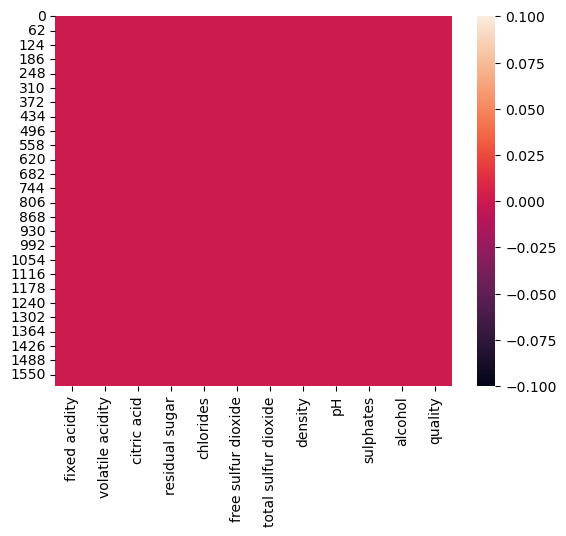

In [163]:
sns.heatmap(df.isnull()) # there is no null value present in given data.

# To Check Correlation 

In [164]:
dfcor=df.corr()

In [165]:
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

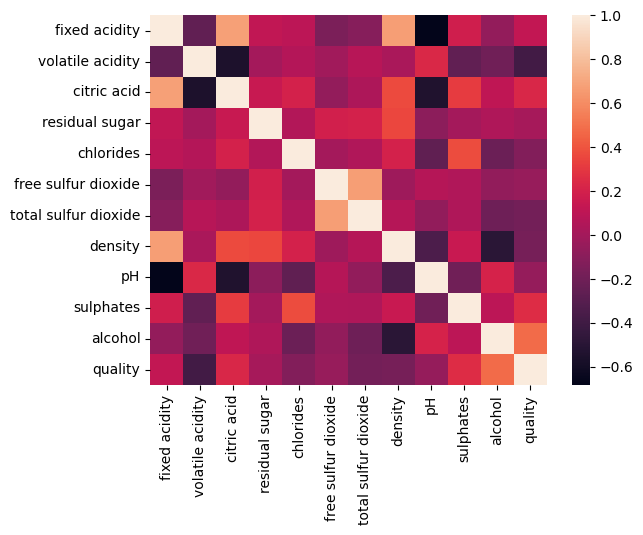

In [166]:
sns.heatmap(dfcor)

<AxesSubplot:>

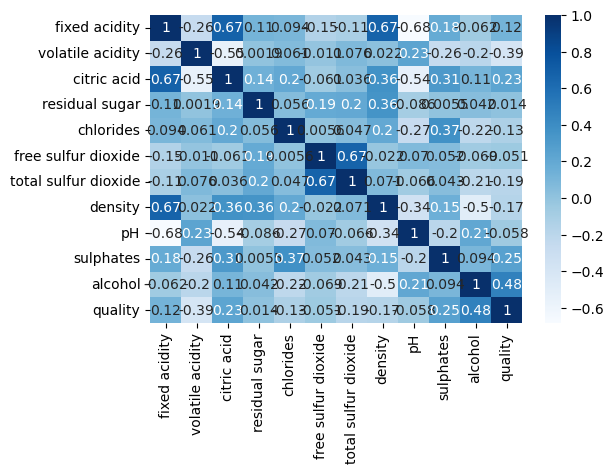

In [167]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

<AxesSubplot:>

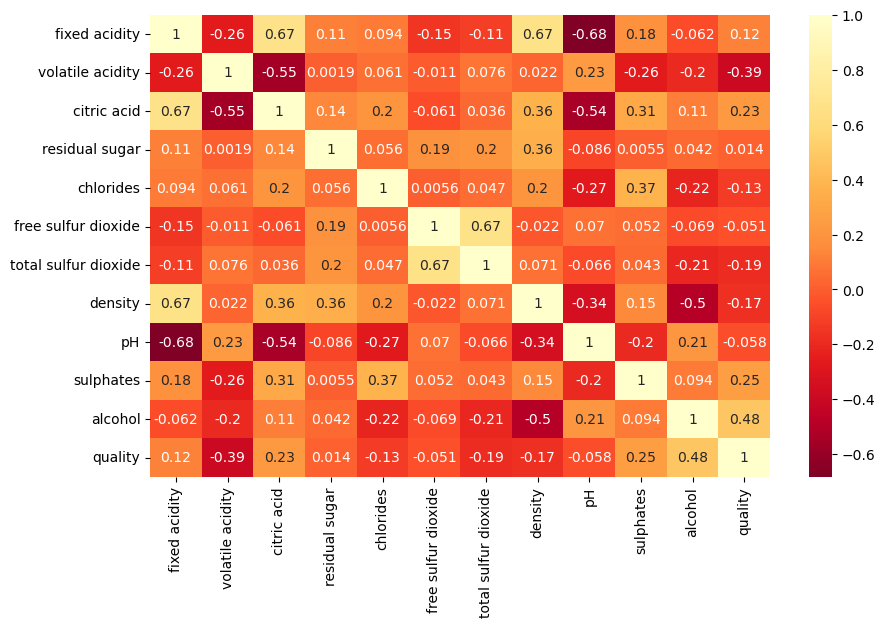

In [168]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True) 

# plotting Outliers

In [169]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

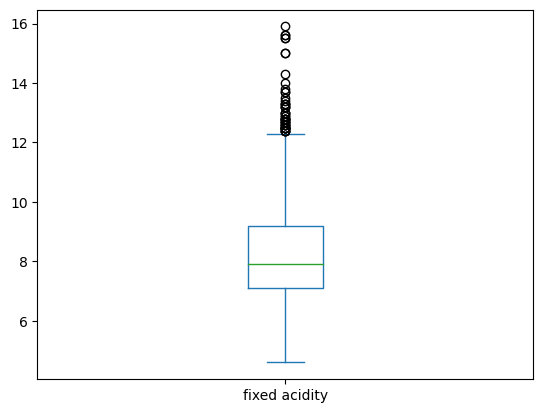

In [170]:
df['fixed acidity'].plot.box()

<AxesSubplot:>

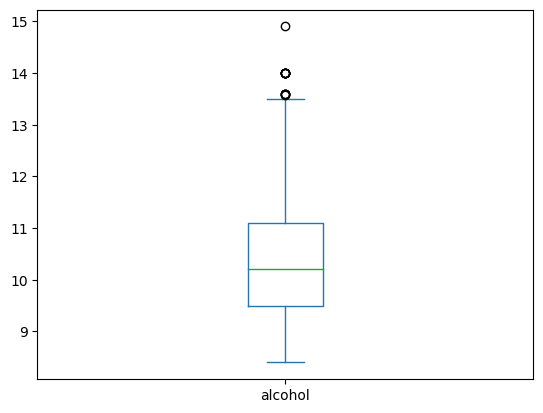

In [171]:
df['alcohol'].plot.box()

fixed acidity              AxesSubplot(0.125,0.53;0.110714x0.35)
volatile acidity        AxesSubplot(0.257857,0.53;0.110714x0.35)
citric acid             AxesSubplot(0.390714,0.53;0.110714x0.35)
residual sugar          AxesSubplot(0.523571,0.53;0.110714x0.35)
chlorides               AxesSubplot(0.656429,0.53;0.110714x0.35)
free sulfur dioxide     AxesSubplot(0.789286,0.53;0.110714x0.35)
total sulfur dioxide       AxesSubplot(0.125,0.11;0.110714x0.35)
density                 AxesSubplot(0.257857,0.11;0.110714x0.35)
pH                      AxesSubplot(0.390714,0.11;0.110714x0.35)
sulphates               AxesSubplot(0.523571,0.11;0.110714x0.35)
alcohol                 AxesSubplot(0.656429,0.11;0.110714x0.35)
quality                 AxesSubplot(0.789286,0.11;0.110714x0.35)
dtype: object

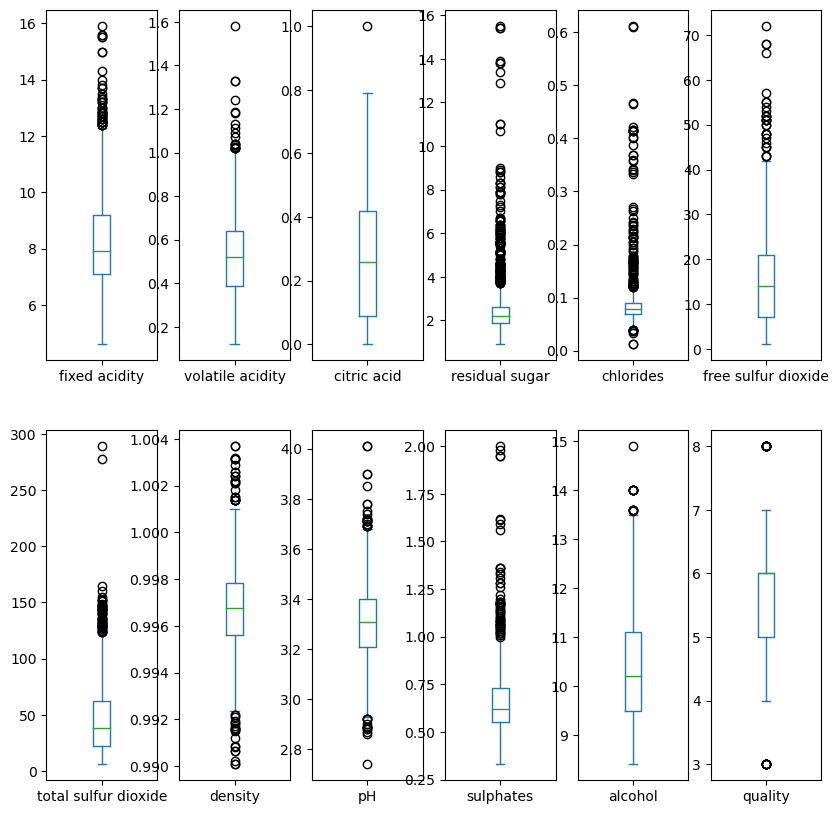

In [172]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

fixed acidity              AxesSubplot(0.125,0.653529;0.168478x0.226471)
volatile acidity        AxesSubplot(0.327174,0.653529;0.168478x0.226471)
citric acid             AxesSubplot(0.529348,0.653529;0.168478x0.226471)
residual sugar          AxesSubplot(0.731522,0.653529;0.168478x0.226471)
chlorides                  AxesSubplot(0.125,0.381765;0.168478x0.226471)
free sulfur dioxide     AxesSubplot(0.327174,0.381765;0.168478x0.226471)
total sulfur dioxide    AxesSubplot(0.529348,0.381765;0.168478x0.226471)
density                 AxesSubplot(0.731522,0.381765;0.168478x0.226471)
pH                             AxesSubplot(0.125,0.11;0.168478x0.226471)
sulphates                   AxesSubplot(0.327174,0.11;0.168478x0.226471)
alcohol                     AxesSubplot(0.529348,0.11;0.168478x0.226471)
quality                     AxesSubplot(0.731522,0.11;0.168478x0.226471)
dtype: object

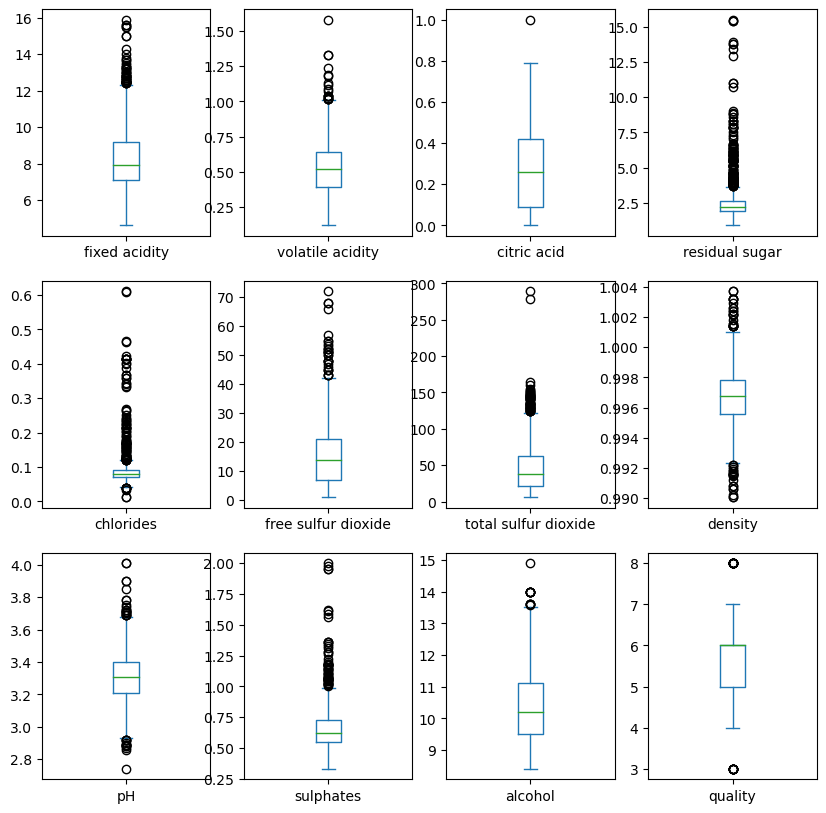

In [173]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

fixed acidity              AxesSubplot(0.125,0.712609;0.227941x0.167391)
volatile acidity        AxesSubplot(0.398529,0.712609;0.227941x0.167391)
citric acid             AxesSubplot(0.672059,0.712609;0.227941x0.167391)
residual sugar             AxesSubplot(0.125,0.511739;0.227941x0.167391)
chlorides               AxesSubplot(0.398529,0.511739;0.227941x0.167391)
free sulfur dioxide     AxesSubplot(0.672059,0.511739;0.227941x0.167391)
total sulfur dioxide        AxesSubplot(0.125,0.31087;0.227941x0.167391)
density                  AxesSubplot(0.398529,0.31087;0.227941x0.167391)
pH                       AxesSubplot(0.672059,0.31087;0.227941x0.167391)
sulphates                      AxesSubplot(0.125,0.11;0.227941x0.167391)
alcohol                     AxesSubplot(0.398529,0.11;0.227941x0.167391)
quality                     AxesSubplot(0.672059,0.11;0.227941x0.167391)
dtype: object

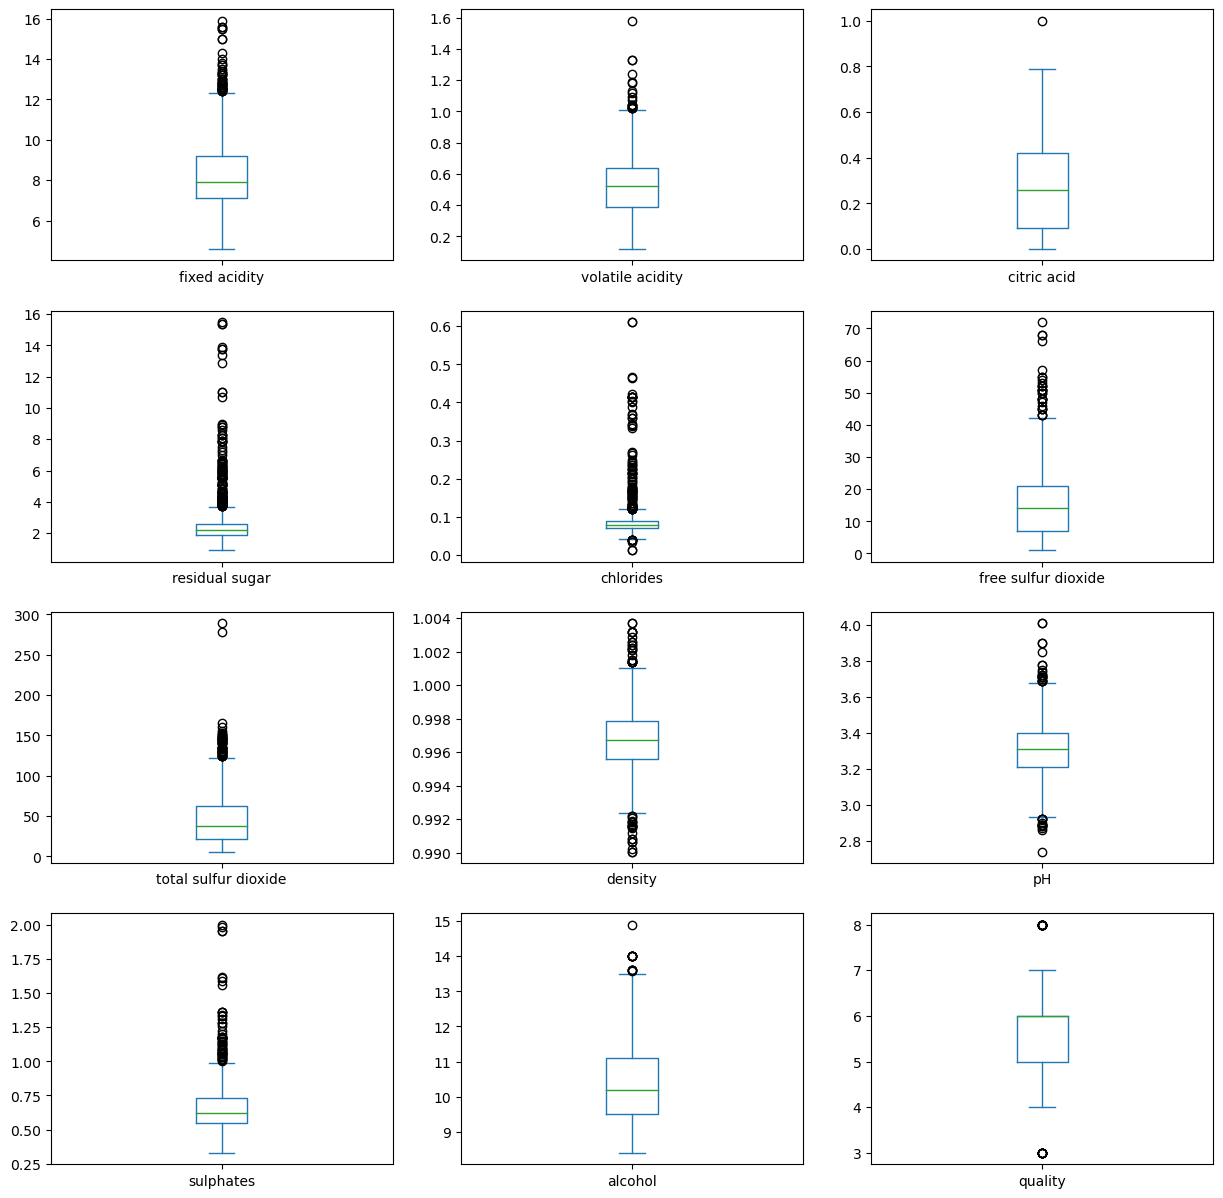

In [174]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(15,15))

# TO Check Distribution Of Skewness

<AxesSubplot:xlabel='density', ylabel='Density'>

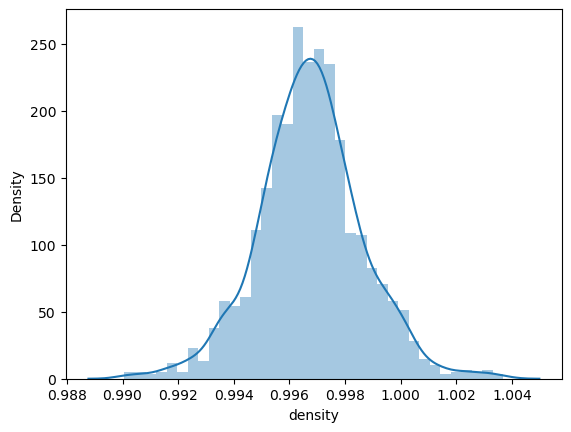

In [175]:
sns.distplot(df['density'])

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

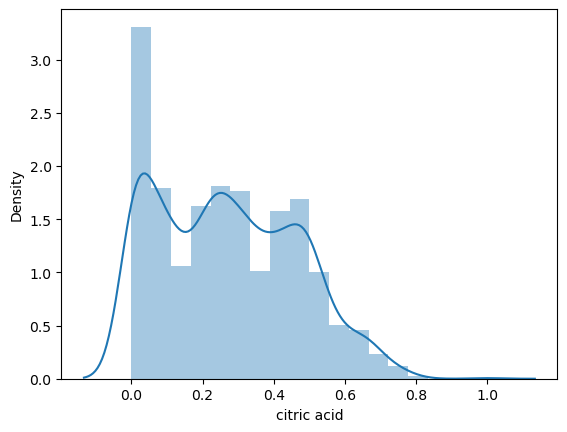

In [176]:
sns.distplot(df['citric acid'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

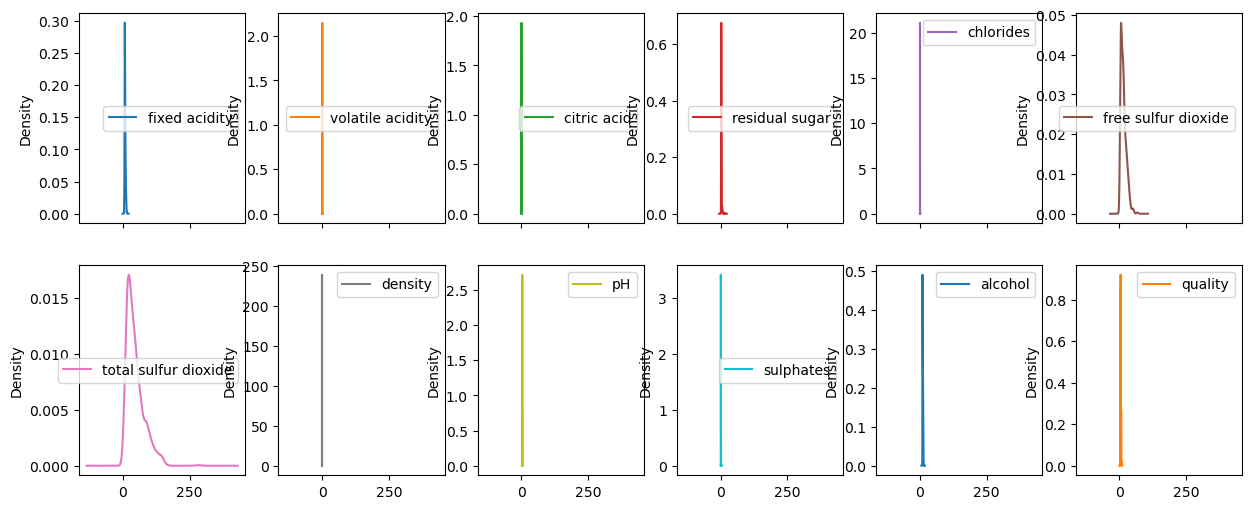

In [177]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

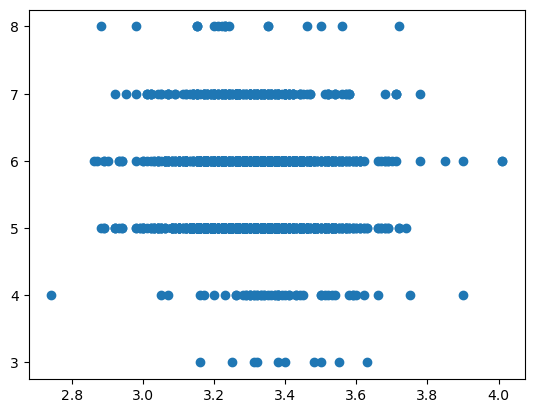

In [178]:
# Bivarite Analysis
plt.scatter(df['pH'],df['quality'])

In [179]:
x=df.iloc[:,:]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [180]:
x=df.iloc[:,0:-1]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [181]:
# only last column are display.
y=df.iloc[:,-1]
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [182]:
x.shape

(1599, 11)

In [183]:
y.shape

(1599,)

In [184]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [185]:
x_train.shape

(1119, 11)

In [186]:
y_train.shape

(480, 11)

In [187]:
x_test.shape

(1119,)

In [188]:
y_test.shape

(480,)

In [191]:
dt=DecisionTreeClassifier()

In [192]:
dt

DecisionTreeClassifier()